# Modeling

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [11]:
data = pd.read_csv("/Users/brianchoi/Documents/Data_Science/Projects/NBA_Draft_Prediction/Data/collegeplayer_cleaned2.csv")

In [12]:
data

,Unnamed: 0,AFFILIATION,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,mp,oreb,dreb,treb,ast,stl,blk,pts,Position,Class
0,0,Oklahoma State,B12,27,78.0,104.1,28.6,51.6,57.46,2.3,...,35.4074,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,1
1,1,Southern California,P12,33,83.6,119.4,23.4,59.5,62.40,9.7,...,33.9394,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,1
2,2,Florida State,ACC,24,58.9,107.5,25.3,53.1,54.78,7.4,...,24.7917,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,1
3,3,Gonzaga,WCC,30,67.5,110.4,25.3,55.9,59.39,2.7,...,28.9333,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,1
4,4,Michigan,B10,27,66.1,105.5,18.6,53.4,56.59,3.4,...,30.7407,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,1482,St. Mary's (CA),WCC,24,61.7,108.8,29.0,47.6,52.27,1.6,...,33.9583,0.4583,1.8333,2.2917,3.7917,2.2083,0.2083,18.6250,NaN,0
1483,1483,Saint Joseph's,A10,32,96.5,119.7,22.9,61.2,66.99,12.5,...,39.3438,3.9375,7.8750,11.8125,1.0000,0.8125,1.7500,19.1562,NaN,0
1484,1484,Tennessee-Martin,OVC,30,90.6,115.3,35.5,51.7,56.00,6.5,...,36.5333,2.2000,5.8667,8.0667,4.1333,2.1000,0.6000,27.7333,NaN,0
1485,1485,Texas A&M,B12,33,59.1,112.0,20.4,66.3,65.87,13.8,...,23.7273,2.7879,4.4242,7.2121,0.3030,0.3030,1.5758,9.7273,NaN,0


In [13]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
data.head()

,AFFILIATION,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,mp,oreb,dreb,treb,ast,stl,blk,pts,Position,Class
0,Oklahoma State,B12,27,78.0,104.1,28.6,51.6,57.46,2.3,16.2,...,35.4074,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,1
1,Southern California,P12,33,83.6,119.4,23.4,59.5,62.40,9.7,18.8,...,33.9394,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,1
2,Florida State,ACC,24,58.9,107.5,25.3,53.1,54.78,7.4,11.0,...,24.7917,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,1
3,Gonzaga,WCC,30,67.5,110.4,25.3,55.9,59.39,2.7,18.0,...,28.9333,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,1
4,Michigan,B10,27,66.1,105.5,18.6,53.4,56.59,3.4,16.8,...,30.7407,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F,1


In [17]:
# Selecting predictor variables based on EDA

sel_col = ['Rec Rank', 'dbpm', 'obpm', 'bpm', 'stops', 'dporpag', 'porpag', 'ftr', 
'stl_per', 'twoPM', 'FTA', 'FTM', 'ORB_per', 'yr', 'AFFILIATION', 'conf', 'Class']

df = data.loc[:, sel_col].copy()

# Encoding categorical variables
df_dummies = pd.get_dummies(df.loc[:, ['yr', 'AFFILIATION', 'conf']])
df.drop(columns=['yr', 'AFFILIATION', 'conf'], inplace=True)

# Merging dummies and numeric variables
final_df = pd.concat([df, df_dummies], axis=1)

final_df

,Rec Rank,dbpm,obpm,bpm,stops,dporpag,porpag,ftr,stl_per,twoPM,...,conf_P12,conf_Pat,conf_SB,conf_SC,conf_SEC,conf_SWAC,conf_Slnd,conf_Sum,conf_WAC,conf_WCC
0,100.0,3.089750,3.19980,6.28955,207.722,4.47388,4.33352,38.9,2.5,114,...,0,0,0,0,0,0,0,0,0,0
1,99.6,7.466380,5.53482,13.00120,256.359,5.00113,5.41065,56.6,1.4,185,...,1,0,0,0,0,0,0,0,0,0
2,99.0,3.325160,4.94571,8.27087,119.770,3.00240,2.97007,33.8,3.4,87,...,0,0,0,0,0,0,0,0,0,0
3,98.2,4.473150,4.85317,9.32632,209.261,4.13889,3.79887,37.1,3.5,119,...,0,0,0,0,0,0,0,0,0,1
4,90.2,3.225720,2.63123,5.85695,171.133,4.12090,2.56112,21.6,2.4,72,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,NaN,0.258865,4.90741,5.16627,143.825,3.43490,4.66241,25.7,3.9,87,...,0,0,0,0,0,0,0,0,0,1
1483,73.8,2.372230,3.18525,5.55748,261.974,4.40826,5.71878,77.0,1.3,205,...,0,0,0,0,0,0,0,0,0,0
1484,NaN,1.187370,7.93000,9.11737,247.094,3.56984,6.26497,24.7,3.3,197,...,0,0,0,0,0,0,0,0,0,0
1485,NaN,2.798950,2.36602,5.16497,165.533,2.83551,2.70618,59.5,0.8,126,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [32]:
# Setting features and target

# Features
X = final_df.drop(columns='Class', axis=1)
# Target
y = final_df['Class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
# Filling missing data

from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='median')
X_train_imputed = si.fit_transform(X_train)
X_test_imputed = si.transform(X_test)

In [35]:
# Creating a function to check model performances

def check_scores(dct, model_type, model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    cv_score_train = cross_val_score(model, X_train, y_train, cv=5)
    err_train = mean_squared_error(y_train, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred)
    precision_train = precision_score(y_train, y_pred)

    plot_confusion_matrix(model, X_train, y_train)
    plt.show()

    print("For Training Sets:   ")
    print('Cross Validation Score: {}'.format(np.mean(cv_score_train)))
    print('MSE Score: {}'.format(err_train))
    print('Accuracy: {}'.format(accuracy_train))
    print('Precision: {}'.format(precision_train))

    print('---------------------------------------------------------')

    cv_score_test = cross_val_score(model, X_test, y_test, cv=5)
    err_test = mean_squared_error(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)

    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    print("For Test Sets:  ")
    print('Cross Validation Score: {}'.format(np.mean(cv_score_test)))
    print('MSE Score: {}'.format(err_test))
    print('Accuracy: {}'.format(accuracy_test))
    print('Precision: {}'.format(precision_test))

    dct['Model Type'].append(model_type)
    dct['CV Score Training'].append(np.mean(cv_score_train))
    dct['MSE Training'].append(err_train)
    dct['Accuracy Training'].append(accuracy_train)
    dct['Precision Training'].append(precision_train)
    dct['CV Score Test'].append(np.mean(cv_score_test))
    dct['MSE Test'].append(err_test)
    dct['Accuracy Test'].append(accuracy_test)
    dct['Precision Test'].append(precision_test)
    dct['Model'].append(model)



In [36]:
models_dct = {'Model Type': [], 'CV Score Training': [], 'MSE Training': [], 'Accuracy Training': [],
    'Precision Training': [], 'CV Score Test': [], 'MSE Test': [], 'Accuracy Test': [],
    'Precision Test': [], 'Model': []}

### Logistic Regression Model

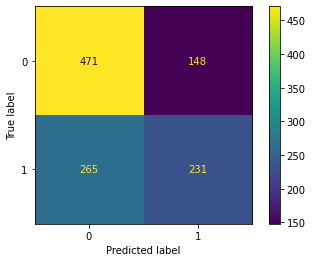

For Training Sets:   
Cross Validation Score: 0.6215246636771301
MSE Score: 0.3704035874439462
Accuracy: 0.6295964125560538
Precision: 0.6094986807387863
---------------------------------------------------------


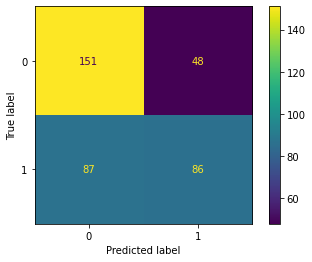

For Test Sets:  
Cross Validation Score: 0.5643603603603603
MSE Score: 0.3629032258064516
Accuracy: 0.6370967741935484
Precision: 0.6417910447761194


In [37]:
logreg = LogisticRegression()
logreg.fit(X_train_imputed, y_train)

check_scores(models_dct, 'logreg', logreg, X_train_imputed, y_train, X_test_imputed, y_test)

### Decision Tree Model

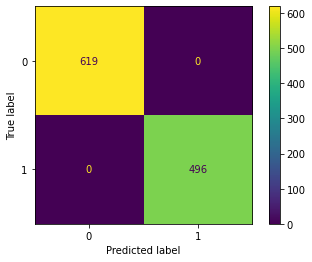

For Training Sets:   
Cross Validation Score: 0.6295964125560538
MSE Score: 0.0
Accuracy: 1.0
Precision: 1.0
---------------------------------------------------------


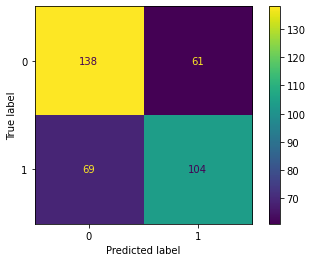

For Test Sets:  
Cross Validation Score: 0.5723963963963963
MSE Score: 0.34946236559139787
Accuracy: 0.6505376344086021
Precision: 0.6303030303030303


In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train_imputed, y_train)

check_scores(models_dct, 'dt', dt, X_train_imputed, y_train, X_test_imputed, y_test)

### Random Forest Model

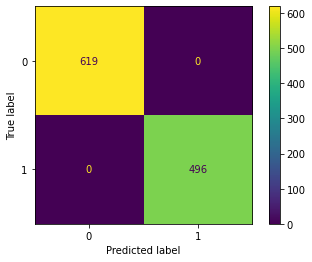

For Training Sets:   
Cross Validation Score: 0.6735426008968609
MSE Score: 0.0
Accuracy: 1.0
Precision: 1.0
---------------------------------------------------------


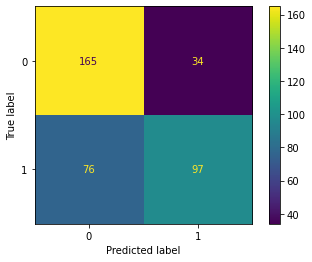

For Test Sets:  
Cross Validation Score: 0.645045045045045
MSE Score: 0.2956989247311828
Accuracy: 0.7043010752688172
Precision: 0.7404580152671756


In [39]:
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

check_scores(models_dct, 'rf', rf, X_train_imputed, y_train, X_test_imputed, y_test)

### K Nearest Neighbor Model

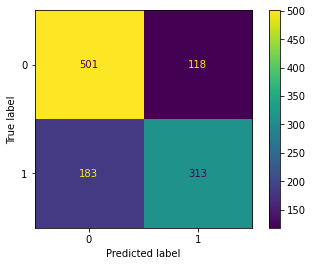

For Training Sets:   
Cross Validation Score: 0.5623318385650224
MSE Score: 0.2699551569506726
Accuracy: 0.7300448430493274
Precision: 0.7262180974477959
---------------------------------------------------------


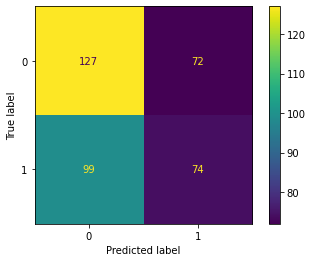

For Test Sets:  
Cross Validation Score: 0.5351351351351352
MSE Score: 0.4596774193548387
Accuracy: 0.5403225806451613
Precision: 0.5068493150684932


In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)

check_scores(models_dct, 'knn', knn, X_train_imputed, y_train, X_test_imputed, y_test)

### Support Vector Classifier Model

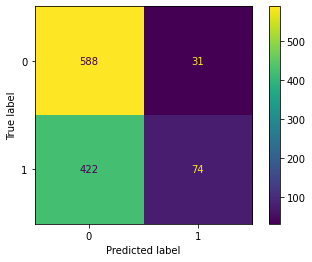

For Training Sets:   
Cross Validation Score: 0.5874439461883407
MSE Score: 0.4062780269058296
Accuracy: 0.5937219730941704
Precision: 0.7047619047619048
---------------------------------------------------------


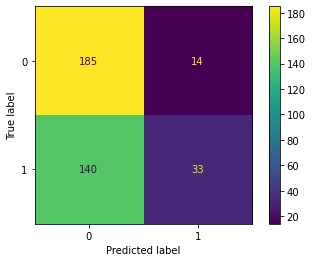

For Test Sets:  
Cross Validation Score: 0.5723243243243243
MSE Score: 0.41397849462365593
Accuracy: 0.5860215053763441
Precision: 0.7021276595744681


In [40]:
svc = SVC()
svc.fit(X_train_imputed, y_train)

check_scores(models_dct, 'svc', svc, X_train_imputed, y_train, X_test_imputed, y_test)

### Extra Trees Classifier Model

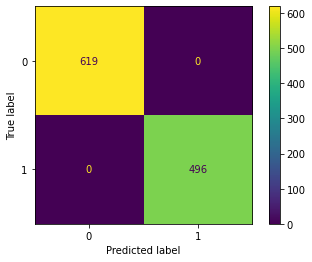

For Training Sets:   
Cross Validation Score: 0.6878923766816143
MSE Score: 0.0
Accuracy: 1.0
Precision: 1.0
---------------------------------------------------------


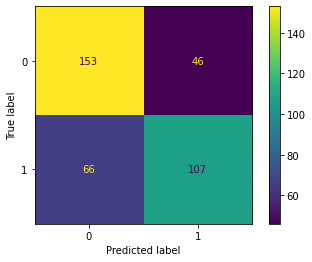

For Test Sets:  
Cross Validation Score: 0.6556756756756756
MSE Score: 0.3010752688172043
Accuracy: 0.6989247311827957
Precision: 0.6993464052287581


In [42]:
et = ExtraTreesClassifier()
et.fit(X_train_imputed, y_train)

check_scores(models_dct, 'et', et, X_train_imputed, y_train, X_test_imputed, y_test)

### Gradient Boosting Classifier Model

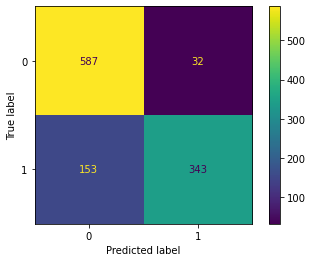

For Training Sets:   
Cross Validation Score: 0.7085201793721972
MSE Score: 0.16591928251121077
Accuracy: 0.8340807174887892
Precision: 0.9146666666666666
---------------------------------------------------------


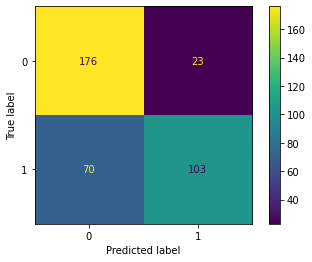

For Test Sets:  
Cross Validation Score: 0.6774414414414414
MSE Score: 0.25
Accuracy: 0.75
Precision: 0.8174603174603174


In [43]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_imputed, y_train)

check_scores(models_dct, 'gbc', gbc, X_train_imputed, y_train, X_test_imputed, y_test)

### Model Performance Analysis

In [46]:
# Top Accuracy Scores
pd.DataFrame(models_dct).sort_values(by='Accuracy Test', ascending=False)

,Model Type,CV Score Training,MSE Training,Accuracy Training,Precision Training,CV Score Test,MSE Test,Accuracy Test,Precision Test,Model
5,gbc,0.708520,0.165919,0.834081,0.914667,0.677441,0.250000,0.750000,0.817460,([DecisionTreeRegressor(criterion='friedman_ms...
2,rf,0.673543,0.000000,1.000000,1.000000,0.645045,0.295699,0.704301,0.740458,"(DecisionTreeClassifier(max_features='auto', r..."
4,et,0.687892,0.000000,1.000000,1.000000,0.655676,0.301075,0.698925,0.699346,"(ExtraTreeClassifier(random_state=238285951), ..."
1,dt,0.629596,0.000000,1.000000,1.000000,0.572396,0.349462,0.650538,0.630303,DecisionTreeClassifier()
0,logreg,0.621525,0.370404,0.629596,0.609499,0.564360,0.362903,0.637097,0.641791,LogisticRegression()
3,svc,0.587444,0.406278,0.593722,0.704762,0.572324,0.413978,0.586022,0.702128,SVC()


In [48]:
# Top Cross Validation Scores
pd.DataFrame(models_dct).sort_values(by='CV Score Test', ascending=False)

,Model Type,CV Score Training,MSE Training,Accuracy Training,Precision Training,CV Score Test,MSE Test,Accuracy Test,Precision Test,Model
5,gbc,0.708520,0.165919,0.834081,0.914667,0.677441,0.250000,0.750000,0.817460,([DecisionTreeRegressor(criterion='friedman_ms...
4,et,0.687892,0.000000,1.000000,1.000000,0.655676,0.301075,0.698925,0.699346,"(ExtraTreeClassifier(random_state=238285951), ..."
2,rf,0.673543,0.000000,1.000000,1.000000,0.645045,0.295699,0.704301,0.740458,"(DecisionTreeClassifier(max_features='auto', r..."
1,dt,0.629596,0.000000,1.000000,1.000000,0.572396,0.349462,0.650538,0.630303,DecisionTreeClassifier()
3,svc,0.587444,0.406278,0.593722,0.704762,0.572324,0.413978,0.586022,0.702128,SVC()
0,logreg,0.621525,0.370404,0.629596,0.609499,0.564360,0.362903,0.637097,0.641791,LogisticRegression()


Top 3 Models: Grandient Boosting, Random Forest, Extra Trees

### Stacking Model

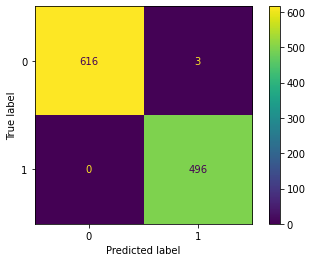

For Training Sets:   
Cross Validation Score: 0.7130044843049327
MSE Score: 0.0026905829596412557
Accuracy: 0.9973094170403587
Precision: 0.9939879759519038
---------------------------------------------------------


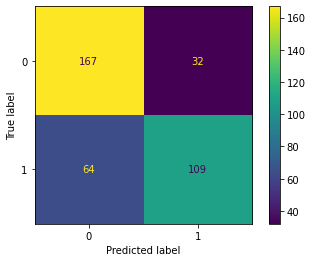

For Test Sets:  
Cross Validation Score: 0.6879639639639639
MSE Score: 0.25806451612903225
Accuracy: 0.7419354838709677
Precision: 0.7730496453900709


In [49]:
from sklearn.ensemble import StackingClassifier

estimator_list = [('gbc', gbc), ('rf', rf), ('et', et)]

stacked = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression())

stacked.fit(X_train_imputed, y_train)

check_scores(models_dct, 'stacked', stacked, X_train_imputed, y_train, X_test_imputed, y_test)

Insights - Stacked

Not much of an improvement from stacked model.

## ADA Boosting

Use AdaBoosterClassifier on the top three models to see if there's improvement

### Random Forest Boosted Model

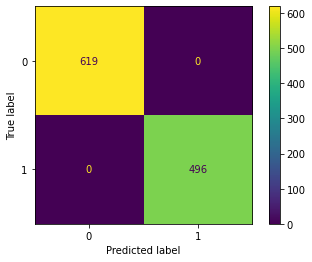

For Training Sets:   
Cross Validation Score: 0.6735426008968609
MSE Score: 0.0
Accuracy: 1.0
Precision: 1.0
---------------------------------------------------------


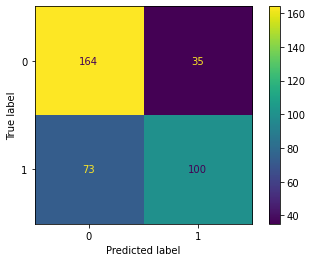

For Test Sets:  
Cross Validation Score: 0.6773693693693693
MSE Score: 0.2903225806451613
Accuracy: 0.7096774193548387
Precision: 0.7407407407407407


In [50]:
from sklearn.ensemble import AdaBoostClassifier
ada_rf = AdaBoostClassifier(base_estimator=RandomForestClassifier())

ada_rf.fit(X_train_imputed, y_train)

check_scores(models_dct, 'ada_rf', ada_rf, X_train_imputed, y_train, X_test_imputed, y_test)

### Gradient Boosting Classifier Boosted Model

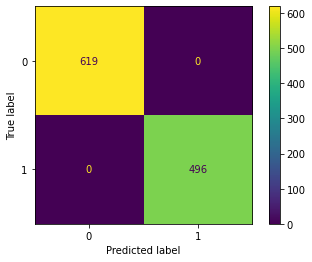

For Training Sets:   
Cross Validation Score: 0.7201793721973093
MSE Score: 0.0
Accuracy: 1.0
Precision: 1.0
---------------------------------------------------------


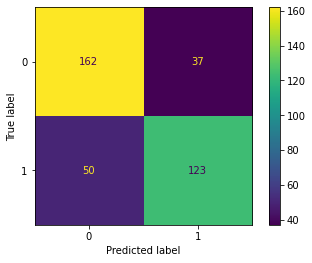

For Test Sets:  
Cross Validation Score: 0.7068468468468468
MSE Score: 0.23387096774193547
Accuracy: 0.7661290322580645
Precision: 0.76875


In [51]:

ada_gbc = AdaBoostClassifier(base_estimator=GradientBoostingClassifier())

ada_gbc.fit(X_train_imputed, y_train)

check_scores(models_dct, 'ada_gbc', ada_gbc, X_train_imputed, y_train, X_test_imputed, y_test)

### Extra Trees Boosted Model

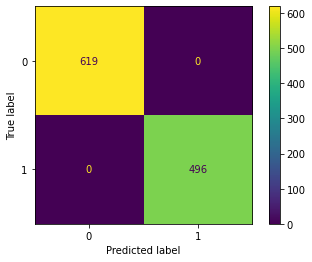

For Training Sets:   
Cross Validation Score: 0.6708520179372197
MSE Score: 0.0
Accuracy: 1.0
Precision: 1.0
---------------------------------------------------------


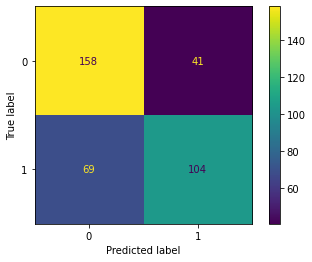

For Test Sets:  
Cross Validation Score: 0.6691891891891892
MSE Score: 0.2956989247311828
Accuracy: 0.7043010752688172
Precision: 0.7172413793103448


In [52]:
ada_et = AdaBoostClassifier(base_estimator=ExtraTreesClassifier())

ada_et.fit(X_train_imputed, y_train)

check_scores(models_dct, 'ada_et', ada_et, X_train_imputed, y_train, X_test_imputed, y_test)

In [53]:
# Top Accuracy Scores
pd.DataFrame(models_dct).sort_values(by='Accuracy Test', ascending=False)

,Model Type,CV Score Training,MSE Training,Accuracy Training,Precision Training,CV Score Test,MSE Test,Accuracy Test,Precision Test,Model
8,ada_gbc,0.720179,0.000000,1.000000,1.000000,0.706847,0.233871,0.766129,0.768750,(([DecisionTreeRegressor(criterion='friedman_m...
5,gbc,0.708520,0.165919,0.834081,0.914667,0.677441,0.250000,0.750000,0.817460,([DecisionTreeRegressor(criterion='friedman_ms...
6,stacked,0.713004,0.002691,0.997309,0.993988,0.687964,0.258065,0.741935,0.773050,"StackingClassifier(estimators=[('gbc', Gradien..."
7,ada_rf,0.673543,0.000000,1.000000,1.000000,0.677369,0.290323,0.709677,0.740741,"((DecisionTreeClassifier(max_features='auto', ..."
2,rf,0.673543,0.000000,1.000000,1.000000,0.645045,0.295699,0.704301,0.740458,"(DecisionTreeClassifier(max_features='auto', r..."
9,ada_et,0.670852,0.000000,1.000000,1.000000,0.669189,0.295699,0.704301,0.717241,((ExtraTreeClassifier(random_state=1705783046)...
4,et,0.687892,0.000000,1.000000,1.000000,0.655676,0.301075,0.698925,0.699346,"(ExtraTreeClassifier(random_state=238285951), ..."
1,dt,0.629596,0.000000,1.000000,1.000000,0.572396,0.349462,0.650538,0.630303,DecisionTreeClassifier()
0,logreg,0.621525,0.370404,0.629596,0.609499,0.564360,0.362903,0.637097,0.641791,LogisticRegression()
3,svc,0.587444,0.406278,0.593722,0.704762,0.572324,0.413978,0.586022,0.702128,SVC()


In [54]:
# Top Cross Validation Scores
pd.DataFrame(models_dct).sort_values(by='CV Score Test', ascending=False)

,Model Type,CV Score Training,MSE Training,Accuracy Training,Precision Training,CV Score Test,MSE Test,Accuracy Test,Precision Test,Model
8,ada_gbc,0.720179,0.000000,1.000000,1.000000,0.706847,0.233871,0.766129,0.768750,(([DecisionTreeRegressor(criterion='friedman_m...
6,stacked,0.713004,0.002691,0.997309,0.993988,0.687964,0.258065,0.741935,0.773050,"StackingClassifier(estimators=[('gbc', Gradien..."
5,gbc,0.708520,0.165919,0.834081,0.914667,0.677441,0.250000,0.750000,0.817460,([DecisionTreeRegressor(criterion='friedman_ms...
7,ada_rf,0.673543,0.000000,1.000000,1.000000,0.677369,0.290323,0.709677,0.740741,"((DecisionTreeClassifier(max_features='auto', ..."
9,ada_et,0.670852,0.000000,1.000000,1.000000,0.669189,0.295699,0.704301,0.717241,((ExtraTreeClassifier(random_state=1705783046)...
4,et,0.687892,0.000000,1.000000,1.000000,0.655676,0.301075,0.698925,0.699346,"(ExtraTreeClassifier(random_state=238285951), ..."
2,rf,0.673543,0.000000,1.000000,1.000000,0.645045,0.295699,0.704301,0.740458,"(DecisionTreeClassifier(max_features='auto', r..."
1,dt,0.629596,0.000000,1.000000,1.000000,0.572396,0.349462,0.650538,0.630303,DecisionTreeClassifier()
3,svc,0.587444,0.406278,0.593722,0.704762,0.572324,0.413978,0.586022,0.702128,SVC()
0,logreg,0.621525,0.370404,0.629596,0.609499,0.564360,0.362903,0.637097,0.641791,LogisticRegression()


Insights

Grandient Boosting model had improvement in performance with AdaBoosterClassifier
(77% accuracy score).